In [1]:
import theano.tensor as T
import numpy as np
import matplotlib.pyplot as plt 

from ilqr import iLQR
from ilqr.dynamics import AutoDiffDynamics
from ilqr.cost import QRCost

In [2]:
x = T.dscalar("x")  # Position.
x_dot = T.dscalar("x_dot")  # Velocity.
u = T.dscalar("u")  # Force.

dt = 0.1
 
#x_dot_dot = l*(x_dot - x**2) -u
x_dot_dot = -np.sin(x) - u

f = T.stack([
    x + (x_dot) * dt,
    x_dot + x_dot_dot * dt,
])

x_inputs = [x, x_dot]  # State vector.
u_inputs = [u]  # Control vector.

dynamics = AutoDiffDynamics(f, x_inputs, u_inputs)

In [3]:
state_size = 2  # [position, velocity]
action_size = 1  # [force]

# The coefficients weigh how much your state error is worth to you vs
# the size of your controls. You can favor a solution that uses smaller
# controls by increasing R's coefficient.
Q = 1 * np.eye(state_size)
R = 1 * np.eye(action_size)

# This is optional if you want your cost to be computed differently at a
# terminal state.
#Q_terminal = np.array([[1.0, 0.0], [0.0, 1.0]])

# State goal is set to a position of 1 m with no velocity.
x_goal = np.array([0.0, 0.0])

# NOTE: This is instantaneous and completely accurate.
cost = QRCost(Q, R, x_goal=x_goal)

In [4]:
N = 101  # Number of time-steps in trajectory.
x0 = np.array([ 3, -3])  # Initial state.
us_init = np.random.uniform(-1, 1, (N, 1)) # Random initial action path.

ilqr = iLQR(dynamics, cost, N)
xs, us = ilqr.fit(x0, us_init)

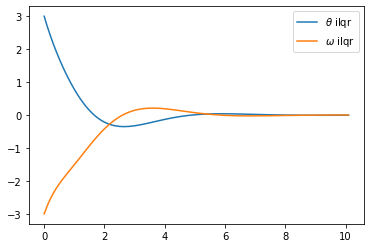

In [5]:
t = np.arange(0, dt*(N+1), dt)
plt.plot(t, xs[:,0], label=r'$\theta$'+' ilqr')
plt.plot(t, xs[:,1], label=r'$\omega$'+' ilqr')
plt.legend()
plt.show()